In [1]:
#!jupyter nbconvert --to slides week4.ipynb --post serve
# http://127.0.0.1:8000/week4.slides.html?print-pdf

<p style="text-align: center; font-size: 192%"> Computational Finance </p>
<img src="img/ABSlogo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 150%"> Week 4: Asset Pricing </p>
<p style="text-align: center; font-size: 75%"> <a href="#copyrightslide">Copyright</a> </p>

In [2]:
#silence some warnings
import warnings
warnings.filterwarnings('ignore')

# Last week: Risk Measures; Plotting

* Python's plotting functionality is stored in the **`matplotlib`** package.
* **Value at Risk** is a single number that measures the risk of holding an asset or portfolio of assets.
* **Asset returns** display lack of autocorrelation, leverage effects, heavy tailed distribution, and volatility clustering.
* Both **nonparametric and parametric methods** can be used to compute the Value at Risk.
    * Nonparametric: historical simulation, KDE
    * Parametric: normal, $t$ distribution
* The methods differ by the assumptions on the return distribution; this should be tested.
* The VaR estimates should be validated by comparing the number of violations to its expected value: they should be **backtested**.

# This week: Asset Pricing

* Anomalies
* Constructing Characteristic Sorted Portfolios

# Asset Pricing

* Asset pricing is about explaining differences in prices across assets (and time).
* Price is the sum of expected discounted payoffs. These payoffs are uncertain, or risky.
* Two dimensions
    * Time series: can we use today's information to predict future asset prices?
    * Cross-sectional: what are characteristics that explain the differences in expected return between assets?

* This lecture: cross-sectional asset pricing.

## Capital Asset Pricing Model (CAPM)

* The CAPM assumes that the market risk is the only risk factor.

    $$
    E[R_{it}-R_{f,t}] = \beta_i (R_{mt}-R_{f,t}),
    $$

    where $R_{mt}$ is the market return and $R_{f,t}$ is the risk free rate.

* Differences in average returns explained by differences in betas $\beta_i$.

### But...

<img src="img/cochrane1999fig4.png" alt="cochrane1999-fig4" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 90%"> Source: <a href="https://www.chicagofed.org/publications/economic-perspectives/1999/3qepart3">Cochrane (1999), New Facts in Finance </a></p>

### Multifactor model

* We can add more risk factors to try to explain B/M and size.

$$
R_{it}-R_{f,t} = \alpha_i + \beta_i' f_{t} + \varepsilon_{it} = \alpha_i + \sum_{k=1}^K \beta_{ik} f_{kt} + \varepsilon_{it}
$$

* The model assumes no pricing errors ($\alpha_i=0$), such that

$$
E[R_{it}-R_{f,t}] = \beta_i'  f_{t}
$$

* In particular, we add
    * Size or SMB: small-minus-big market capitalization
    * Value or HML: high-minus-low book-to-market value



### Improved fit
<img src="img/cochrane1999fig5.png" alt="cochrane1999-fig5" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 90%"> Source: <a href="https://www.chicagofed.org/publications/economic-perspectives/1999/3qepart3">Cochrane (1999), New Facts in Finance </a></p>

### Other anomalies
* Momentum: 
    * Buy winners, short losers
    * Based on last year's returns 
    * $\Rightarrow$ *postive* average return.
    * Profitable in practice?
    
* Reversal: 
    * Buy winner, short losers
    * Based on returns 1 to 5 years ago 
    * $\Rightarrow$ *negative* average return.
    * Relation with growth stocks (low book-to-market)?
    
* Note: this is at the longer horizon, for *monthly* returns. See week 3 for stylized facts of *daily* asset returns.

### Finding anomalies

* Sorting portfolios
    * Allows for nonlinear relationships.
    * Data snooping bias; spurious risk premiums?
    * Bias towards factor structure.
    
* Regression-based
    * Directly get marginal effects.
    * Need to assume functional form.
    * Potentially large effect of outliers.

## Constructing Characteristic Sorted Portfolios

1. Find a characteristic that you believe distinguishes between asset returns.
2. Sort stocks based on this characteristic and split into groups based on this sorting.
3. Compute betas for the portfolio.
4. Compare the spread in alpha.

### 1. Find a characteristic

* Most are computed from accounting numbers or asset returns.
    * May need to merge data sets.
    
    
* Popular:
    * Size: market capitalization
    * Value: book-to-market ratio
    * Momentum: returns over last periods (usually period from $t-12$ to $t-2$)

#### Data

* Wealth of (US) financial data can be accesssed via [Wharton Research Data Services (WRDS)](https://wrds-www.wharton.upenn.edu/). It includes commonly used databases:
    * Stock data from *The Center for Research in Security Prices (CRSP)*.
    * Firm-level accounting data from *Compustat*.
    * Fixed income securities (corporate bonds) data from *TRACE*.

* Many sorted portfolios and factors at [Kenneth French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).
* Chen and Zimmerman's (2021) [Open Source Asset Pricing](https://www.openassetpricing.com/) is a comprehensive set of factors that have been proposed in the literature.

**Example: international indexes sorted on B/M** 

* We consider a set of 20 international market indexes.
* The data consists of the value-weighted monthly simple dollar-returns, in percentages.
* Source: Kenneth French's website. Converted to `csv` beforehand.

In [3]:
import pandas as pd
R = pd.read_csv('data/F-F_International_Countries_Mkt.csv',index_col=0)
R.index = pd.to_datetime(R.index, format='%Y-%m').to_period('M')
R = R.dropna()  # Remove months with missing values (Ireland starts last, in 1991)
R.head()

,Austria,Austrlia,Belgium,Canada,Denmark,Finland,France,Germany,HongKong,Ireland,Italy,Japan,Nethrlnd,NewZland,Norway,Singapor,Spain,Sweden,Swtzrlnd,UK
1991-01,-2.23,5.00,1.98,0.21,3.47,-1.98,4.75,1.93,7.58,-0.37,-2.33,2.98,1.06,7.13,-7.07,4.24,7.12,14.76,5.15,3.36
1991-02,13.14,6.97,10.85,6.92,8.84,9.43,8.41,5.78,9.99,17.52,13.27,11.68,5.88,8.50,10.34,13.27,10.75,9.70,5.00,8.15
1991-03,-9.11,1.56,-6.23,0.17,-9.22,6.23,-6.40,-12.07,5.25,-3.70,-7.80,-5.23,-3.21,-5.44,-6.06,1.06,-2.82,-4.34,-4.06,-4.97
1991-04,2.80,8.03,-1.41,0.67,-1.28,-3.54,-1.75,4.50,-3.43,-5.97,-1.35,2.58,2.83,9.46,-3.55,1.87,-2.50,-4.47,1.24,0.46
1991-05,-2.98,-4.09,-3.07,3.68,1.38,-4.57,0.51,2.96,4.06,0.26,4.21,-1.34,-1.10,3.01,6.72,0.56,1.88,5.16,1.49,-1.32


In [4]:
R.describe()

,Austria,Austrlia,Belgium,Canada,Denmark,Finland,France,Germany,HongKong,Ireland,Italy,Japan,Nethrlnd,NewZland,Norway,Singapor,Spain,Sweden,Swtzrlnd,UK
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,0.653190,0.945517,0.810345,0.834397,0.988161,1.200460,0.865259,0.783218,1.089224,0.740374,0.665632,0.383563,0.964598,0.944540,0.891983,0.832557,0.797874,1.098362,0.972989,0.696437
std,6.137903,5.715196,5.130086,5.274918,5.366559,8.107482,5.494453,5.785085,6.923172,6.662191,6.805346,5.324094,5.357310,5.861817,6.945321,6.629343,6.305345,6.769426,4.448870,4.567104
min,-34.250000,-27.690000,-29.530000,-26.930000,-25.690000,-28.990000,-22.230000,-23.300000,-28.600000,-23.870000,-22.880000,-15.880000,-26.370000,-18.980000,-30.950000,-28.310000,-22.780000,-27.660000,-14.720000,-20.460000
25%,-3.140000,-2.422500,-2.062500,-2.015000,-2.045000,-3.372500,-2.540000,-2.202500,-2.780000,-2.907500,-3.512500,-2.927500,-1.757500,-2.455000,-3.360000,-2.005000,-3.095000,-2.857500,-1.437500,-2.072500
50%,0.930000,1.205000,1.120000,1.140000,1.365000,0.855000,1.110000,1.115000,1.090000,1.135000,0.710000,0.595000,1.335000,1.210000,1.085000,0.900000,0.980000,1.150000,1.300000,0.895000
75%,4.660000,4.282500,3.895000,3.952500,4.362500,5.740000,4.242500,4.510000,4.347500,4.430000,4.665000,3.640000,4.332500,4.657500,5.425000,3.997500,4.807500,5.040000,3.775000,3.522500
max,18.960000,17.090000,16.680000,21.710000,18.100000,30.830000,15.040000,21.990000,32.180000,35.050000,21.220000,17.930000,14.020000,15.170000,19.470000,29.610000,21.140000,25.220000,13.210000,14.320000


* Here, we consider the book-to-market ratio as characteristic. 
* The data is available in the same data set, downloaded and converted to `csv` beforehand.

In [5]:
bm = pd.read_csv('data/F-F_International_Countries_BM.csv',index_col=0)  # B/M times 100
bm.index = pd.to_datetime(bm.index, format='%Y').to_period('Y')
bm = bm.dropna()  # Remove months with missing values (Ireland starts last, in 1991)
bm.head()

,Austria,Austrlia,Belgium,Canada,Denmark,Finland,France,Germany,HongKong,Ireland,Italy,Japan,Nethrlnd,NewZland,Norway,Singapor,Spain,Sweden,Swtzrlnd,UK
1991,39.07,88.40,86.56,75.31,53.08,155.51,73.80,54.90,87.82,71.65,86.20,37.91,80.55,132.51,42.92,61.97,99.87,63.90,82.09,66.95
1992,56.16,66.03,83.85,72.24,58.84,192.13,69.54,54.46,65.77,66.18,91.09,39.78,71.39,90.42,55.63,58.36,89.40,60.89,73.71,56.15
1993,64.18,72.15,88.89,75.78,75.35,166.86,71.24,60.50,58.36,71.04,113.52,54.57,70.82,86.64,56.42,60.10,97.59,59.84,65.06,47.31
1994,48.24,55.12,68.33,58.32,43.61,82.65,57.24,43.49,33.10,44.34,75.02,48.45,49.62,53.73,48.79,39.19,65.29,45.06,45.27,40.47
1995,52.19,60.04,74.94,57.99,45.35,62.32,73.51,48.61,68.39,50.24,78.78,44.82,55.72,61.07,52.40,38.26,75.13,45.14,53.26,47.12


* Momentum

In [6]:
import numpy as np
r = np.log(1 + R / 100) * 100  # Convert to log returns such that we can sum over horizon
mom = r.shift(2).rolling(11).sum()  # Computes the sum over the period t-12 to t-2
mom = mom[12:]  # First year used for estimation of mom
mom.head()

,Austria,Austrlia,Belgium,Canada,Denmark,Finland,France,Germany,HongKong,Ireland,Italy,Japan,Nethrlnd,NewZland,Norway,Singapor,Spain,Sweden,Swtzrlnd,UK
1992-01,-18.749615,27.432909,2.764718,10.433153,10.642893,-21.334706,8.961608,-0.095670,35.757566,8.916580,-5.167291,4.814907,9.569682,17.340446,-25.418391,17.389326,9.265745,11.598598,4.924325,9.110743
1992-02,-17.934698,22.663832,10.416868,10.313333,12.699496,-21.110514,12.451316,4.805301,32.007126,18.508714,1.897723,4.921667,15.626323,5.743998,-6.369962,19.148512,9.944912,2.481501,7.357626,14.074495
1992-03,-27.314690,12.622023,1.061609,4.666788,2.585192,-21.229382,4.954626,-0.265334,29.512405,2.134615,-8.308297,-12.004583,9.371241,-5.243660,-14.543550,9.770110,-0.405709,-6.436994,2.718322,5.365791
1992-04,-12.077388,11.223953,7.683949,3.592858,6.177097,-28.045998,15.740365,15.115611,31.636945,2.176143,-1.952785,-14.537175,13.281788,4.079481,-18.850436,7.457810,5.943257,-5.241988,7.242321,8.972486
1992-05,-19.768434,4.167841,6.899871,-2.341172,1.032839,-33.839928,17.215437,9.121307,35.973558,5.254920,-7.357254,-28.771550,9.566834,-10.510690,-8.273957,1.772568,4.507356,4.931216,4.539183,3.036238


### 2. Sort and group stocks

* Why groups or portfolios?
    * Accurate estimation of beta: less measurement error.
    * Same characteristics over time: *stationarity*.
        * Firms change over time! Example: Philips (lights $\rightarrow$ consumer electronics $\rightarrow$ healthcare technology)


* Why sorting?
    * Group stocks based on similar characteristics.
    * Need spread in average returns; not achieved by random groups.

#### Procedure

* Assume that we want to split the data into $P$ sorted portfolios, then
    * Sort all stocks based on value of characteristic.
    * Determine $P-1$ *breakpoints*.
    * Divide stocks into $P$ groups based on the breakpoints.
* Resorted annually, at the end of June $\Rightarrow$ Returns from July in year $t$ until June in year $t+1$.
    * Momentum portfolios resorted each month.

**Example (continued): international indexes sorted on B/M** 

* We have $N=20$ assets, let's go with $P=5$ groups.
* Equally weighted returns from July 1991 to December 2019.

    
*Procedure in words:*

* For year $t = 1991,\ldots,2019$,
    * Slice to get view of characteristic of year $t$.
    * Determine $P-1$ breakpoints.
    * For portfolio $p = 1,\ldots,P$:
        * Slice to get view of subsample: firms with returns from July, year $t$ to June, year $t+1$ AND characteristic between breakpoints $p-1$ and $p$.
        * Compute return based on the subsample.

*In code:*

In [17]:
P = 5
q = np.linspace(0,1,P+1)  # Find quantiles on [0,1] interval
R_portf = pd.DataFrame(columns=['p'+ str(i) for i in range(1,P+1)], index=R.index, dtype=float) 

for t in bm.index:  # Loop over all years
    # Define for convencience
    bm_t = bm.loc[t]    # Slice to get view of year t observations
    jul_t = '%i-07'%t.year       # July in year t
    jun_t1 = '%i-06'%(t.year+1)  # June in year t+1
    
    # Find B/M quantiles and convert to array (remove index)
    brkpts = bm_t.quantile(q).values  
    brkpts[0] = -np.Inf   # First lower bound, s.t. all assets in a portfolio
    
    # For each portfolio, compute the monthly return
    for p in range(1,P+1):
        # Select subset of indexes with returns from July, year t to June, year t+1 AND characteristic between breakpoints p-1 and p.
        R_subset = R.loc[jul_t:jun_t1, (bm_t > brkpts[p-1]) & (bm_t <= brkpts[p])]
        
        R_portf.loc[jul_t:jun_t1, 'p'+str(p)] = R_subset.mean(axis=1)  # Equally weighted average return; need [rows, cols]
        
R_portf = R_portf['1991-07':]        # Remove 1991-01:1991-06
R_portf.head()

,p1,p2,p3,p4,p5
1991-07,4.1025,4.9550,5.280,5.0000,4.3750
1991-08,-1.0225,-0.2925,1.605,-1.0275,-2.4450
1991-09,2.8375,0.6975,2.870,0.6475,0.1475
1991-10,-4.3775,-1.0275,0.750,-0.3775,2.7050
1991-11,-3.7125,-0.7250,-1.670,1.9625,-3.7625


Create a long-short portfolio: buy portfolio 5 and sell portfolio 1.

In [21]:
R_portf['L-S'] = R_portf.iloc[:,-1] - R_portf.iloc[:,0]
R_portf.head()

,p1,p2,p3,p4,p5,L-S
1991-07,3.6125,4.4650,4.790,4.5100,3.8850,0.2725
1991-08,-1.4825,-0.7525,1.145,-1.4875,-2.9050,-1.4225
1991-09,2.3775,0.2375,2.410,0.1875,-0.3125,-2.6900
1991-10,-4.7975,-1.4475,0.330,-0.7975,2.2850,7.0825
1991-11,-4.1025,-1.1150,-2.060,1.5725,-4.1525,-0.0500


Differences in average returns?

In [22]:
R_portf.mean()

p1     0.480513
p2     0.647731
p3     0.627778
p4     0.601330
p5     0.924503
L-S    0.443990
dtype: float64

In [23]:
R_portf.std()

p1     5.026951
p2     5.359185
p3     5.098036
p4     5.017471
p5     5.172521
L-S    3.372038
dtype: float64

#### Multiple sorts

* Can do sorting and grouping based on multiple characteristics; typically up to three sorts.

* Procedure:
    * Sort *all* stocks based on first characteristic and split into $P_1$ groups based on this sort.

    * *Within each group*: sort the stocks based on the second characteristic and split the stocks into $P_2$ groups.

    * This yields $P=P_1 \times P_2$ groups.
    
* This is called dependent or conditional sorting.

* Alternative is independent sorting:

    * Sort *all* stocks based on first and second characteristic (independently) and determine breakpoints for each characteristic.
    
    * Split into $P=P_1 \times P_2$ groups based on intersection of breakpoints.
    
    
* Independent versus dependent sorting
    * Independent: breakpoints common across each group.
    * Dependent: number of firms equal across sorts.
    * Dependent: start with most influential factor, since all following sorts are conditional on the first sort.

#### Choices to be made
* How many sorts?
* How many portfolios?
* Equal number of firms for each split? 
    * E.g. Fama and French consider 30-40-30 split for value.
* Value-weighted or equal-weighted returns?

### 3. Compute the betas

* Calculate the alphas $\{\alpha_p\}_{p=1,\ldots,P}$ and betas $\{\beta_p\}_{p=1,\ldots,P}$ by performing $P$ time series regressions:

    $$
    R_{pt}-R_{f,t} = \alpha_p + \beta_p' f_t + \varepsilon_{pt},
    $$
    
    with $\varepsilon_{pt} \sim N(0,\sigma_p^2)$ for $t = 1,\ldots,T$, $p = 1,\ldots,P$, where $f_t$ are your risk factors. 

* The factor model implies $E[R_{pt}-R_{f,t}] = \beta_p' f_t$.
* The estimated alphas $\hat{\alpha}_p$ are interpreted as the *pricing errors* or *abnormal returns*.

**Example (continued): international indexes sorted on B/M** 

* Consider the CAPM as our asset pricing model. Read the international (excl. US) factors from Kenneth French's website.

In [24]:
import pandas_datareader.data as web
factors = web.DataReader('Developed_ex_US_3_Factors','famafrench',
                         start=R_portf.index[0].strftime('%Y-%m'), end=R_portf.index[-1].strftime('%Y-%m'))[0]  # Monthly factors
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1991-07,3.03,-2.29,0.80,0.49
1991-08,-3.33,0.02,0.04,0.46
1991-09,5.54,-0.34,-0.30,0.46
1991-10,1.41,-0.93,-2.29,0.42
1991-11,-5.57,1.62,-0.66,0.39


* CAPM time series regression

In [28]:
import statsmodels.api as sm
R_portf = R_portf.subtract(factors.RF, axis=0)  # Subtract risk-free rate
X = sm.add_constant(factors['Mkt-RF'])  # Select market and add a constant
# Initialize lists
alpha = [] 
se_a = []
t_a = []
p_a = []
capmret = []
E = pd.DataFrame(index = R_portf.index, columns=R_portf.columns, dtype=float)

for p in range(P+1):   # P+1 because we also have the L-S portfolio
    capm = sm.OLS(endog=R_portf.iloc[:,p].values, exog=X.values)
    result = capm.fit()
    
    # Append results of interest
    alpha.append(result.params[0])
    se_a.append(result.bse[0])
    t_a.append(result.tvalues[0])
    p_a.append(result.pvalues[0])
    capmret.append(result.fittedvalues.mean() - result.params[0])
    E.iloc[:,p] = result.resid  # Add residuals

### 4. Compare spread in alpha

* Compare alpha (the intercepts) across portfolios.
* Sign of anomaly?

In [29]:
R_abnorm = pd.DataFrame(index=R_portf.columns)
R_abnorm['alpha'] = alpha
R_abnorm['SE'] = se_a
R_abnorm['t'] = t_a 
R_abnorm['p'] = p_a 
R_abnorm

,alpha,SE,t,p
p1,-0.340089,0.116581,-2.917187,0.003767
p2,-0.189862,0.135702,-1.399107,0.162693
p3,-0.195359,0.121767,-1.604361,0.109563
p4,-0.219061,0.115848,-1.890937,0.059483
p5,0.120466,0.149152,0.807672,0.419844
L-S,0.048602,0.182375,0.266494,0.790020


* Plot realized (excess) return against CAPM expected return.

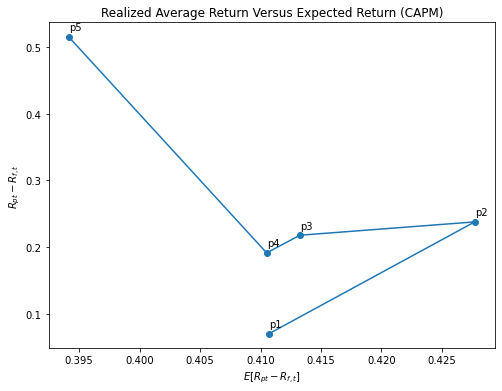

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(capmret[:P], R_portf.iloc[:,:P].mean(), Marker='o')
for i, p in enumerate(R_portf.columns[:P]):   # enumerate(x) returns iterable with each element a tuple: (index, x[index])
    xi = capmret[i]
    yi = R_portf[p].mean()
    plt.annotate(p, (xi, yi), xytext=(xi, yi+0.01))   # Label the portfolios
plt.xlabel('$E[R_{pt}-R_{f,t}]$')
plt.ylabel('$R_{pt}-R_{f,t}$')
plt.title('Realized Average Return Versus Expected Return (CAPM)');

### Testing

* Test significance of individual alphas using a $t$ test.
* Test whether all alphas are jointly zero, using the Gibbons-Ross-Shanken (GRS) test, a type of $F$-test.
* Rejection: asset pricing model is incorrect.
* Stronger than individual test (takes correlation between errors across assets/portfolios into account).

* Suppose we have a multifactor model with $k$ factors, and test the factor model on $T$ observations and $N$ assets (or portfolios),

$$R_{it} = \alpha_i + \beta_i' f_t + \varepsilon_{it},$$

* for $i=1,\ldots,N$ and $t=1,\ldots,T$. 
* Then we can test whether all $\alpha_i=0$ jointly, using the following test statistic (Gibbons, Ross and Shanken, 1989):

$$GRS = \frac{T-N-k}{N} \left(1+\widehat{E[f_t]}' \hat{\Omega}^{-1} \widehat{E[f_t]}\right)^{-1} \hat{\alpha}' \hat{\Sigma}^{-1} \hat{\alpha},$$

* where $\widehat{E[f_t]}$ and $\hat{\Omega}$ are the sample mean vector and covariance matrix of the factors $f_t$, and  $\hat{\Omega} = \frac{1}{T} \sum_{t=1}^T \hat{\varepsilon}_t' \hat{\varepsilon}_t$, with $\hat{\varepsilon}_t = (\hat{\varepsilon}_{1t},\ldots,\hat{\varepsilon}_{Nt})$.

* We reject the null ($\alpha_i = 0$, for all $i$) if GRS is larger than the critical value from the $F_{N,T-N-k}$ distribution.

In [41]:
import scipy.stats as stats
def GRStest(alpha, f, E):
    """
    Compute the GRS test statistic and corresponding p-value.
    
    GRS ~ F_n,t-n-k
    """
    
    alpha = np.array(alpha)  # convert to array if input is list
    alpha = alpha[:, np.newaxis]
    
    # Get dimensions
    t, n = E.shape   # T = no. of time periods; N = no. of assets/portfolios
    try:   # In try/except statement if f is one-dimensional
        k = f.shape[1]    # k = no. of factors.
    except:
        k = 1
    
    # Factor sample moments (and inverse)
    Ef = f.mean()
    if k > 1:
        Omega = f.cov()
        Omegainv = np.linalg.inv(Omega)  # Compute inverse to 
    else:  # cov() only for 2-dimensional objects
        Omega = f.var()

    # Error covariance (and inverse)
    Sigma = E.cov()
    Sigmainv = np.linalg.inv(Sigma)
    
    # Test statistic and p-value
    if k > 1:
        GRS = ((t-n-k)/n) * (1 + Ef.T @ Omegainv @ Ef)**(-1) * (alpha.T @ Sigmainv @ alpha)
    else:
        GRS = ((t-n-k)/n) / (1 + Ef**2 / Omega) * (alpha.T @ Sigmainv @ alpha)
    p = 1-stats.f.cdf(GRS, n, t-n-k)   # 1-stats.f.cdf(x, dfn, dfd)
    
    return GRS, p    

Compute the GRS test statistic for our example.

In [42]:
f = factors['Mkt-RF']
GRS, p = GRStest(alpha, f, E)
print(GRS, p)

[[79.55893723]] [[1.11022302e-16]]


* Conclusion: we reject the null that $\alpha = 0$ jointly for all portfolios.
* CAPM is unable to price the B/M portfolios correctly.
* Not surprising, given results in US stocks.

### Next step?

Say you have found an anomaly. Now what?

* Can you turn it into a factor? E.g. by taking the L-S portfolio?

* Can you turn in into a profitable investment, or too much trading costs or lack of liquidity?

* What is the economic interpretation? Does it proxy for something?

### Factor zoo

* Large set of suggested anomalies (and factors).
* Are they real or spurious, result of data snooping?
* When testing for anomalies, we should take into account other's efforts.
* This is the so-called *multiple testing* issue.

<img src="img/HLZ-tratios.png" alt="HLZ" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 90%"> Source: <a href="https://academic.oup.com/rfs/article/29/1/5/1843824">Harvey, Liu and Zhou (2016)</a></p>

# Summary

* (Cross-sectional) asset pricing models aim to explain the differences in average prices (and hence returns) across assets.
* **Anomalies** are abnormal returns not explained by an asset pricing model.
* Creating **characteristic sorted portfolios**:
    1. Find a characteristic
    2. Sort and group stocks
    3. Compute alphas and betas
    4. Compare alphas


* More details in the [*Advanced Investments*](https://studiegids.uva.nl/xmlpages/page/2021-2022-en/search-course/course/92574) and [*Quantitative Finance and Algorithmic Trading*](https://studiegids.uva.nl/xmlpages/page/2021-2022-en/search-course/course/92726) courses.

<section id="copyrightslide">

# Copyright Statement
* Course slides were created by Simon Broda for Python 2.7 $-$ Andreas Rapp adapted them to Python 3.6. Maintained and updated by Bart Keijsers.
* Week 4 slides were created by Bart Keijsers. The hierarchical indexing example is from the UvA course Data Science Methods by Cees Diks and Bram Wouters.
* All figures have been produced for this course using Python. Empirical results are based on public data available from [FRED](https://fred.stlouisfed.org/), [Quandl/WIKI](https://www.quandl.com/databases/WIKIP), [Kenneth French's website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and [Yahoo Finance](https://finance.yahoo.com/).
* This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).
* More information on Simon Broda's [Github](https://github.com/s-broda/ComputationalFinance/blob/master/LICENSE.md).